# Merging both stock and sentiment data

In [165]:
import pandas as pd

# Load Data 1 (Sentiment Data)
sentiment_data = pd.read_csv('datasets/sentiment_results_final.csv')

# Load Data 2 (Stock Data)
stock_data = pd.read_csv('datasets/top20stockdata.csv')

In [166]:
sentiment_data

,datetime,title,stock_symbol,sentiment_label,sentiment_score,sentiment_value
0,2013-01-01,No Title Available,AAPL,neutral,0.927140,0.213570
1,2013-01-02,Judge rejects part of Apple App Store suit vs ...,AAPL,negative,0.767952,-0.383976
2,2013-01-02,"Apple testing new iPhone, iOS 7: report",AAPL,neutral,0.800431,0.150215
3,2013-01-03,Microsoft acquires start-up id8: source,MSFT,neutral,0.941208,0.220604
4,2013-01-03,U.S.: time not right for Google executive's No...,GOOGL,neutral,0.867827,0.183914
...,...,...,...,...,...,...
98345,2023-12-31,Legacy Investments: 7 Stocks to Make Your Gran...,AAPL,neutral,0.917067,0.208533
98346,2023-12-31,Why Nvidia Stock Is an Unexpected Value Play f...,NVDA,neutral,0.876867,0.188434
98347,2023-12-31,The Countdown Begins: Scott Devitt Picks His 3...,AMZN,neutral,0.941743,0.220872
98348,2023-12-31,3 Growth Stocks Set to Outperform the Nasdaq i...,GOOGL,positive,0.885819,0.942910


In [167]:
stock_data.head

<bound method NDFrame.head of              date  tick       close        high         low        open  \
0      2013-01-02  AAPL   16.687349   19.821428   19.343929   19.779285   
1      2013-01-02  AMZN   12.865500   12.905000   12.663000   12.804000   
2      2013-01-02  AVGO    2.389274    3.306000    3.224000    3.243000   
3      2013-01-02  COST   80.408707  101.449997  100.209999  100.599998   
4      2013-01-02  GOOG   17.949236   18.107130   17.846855   17.918339   
...           ...   ...         ...         ...         ...         ...   
55355  2023-12-29  TSLA  248.479996  255.190002  247.429993  255.100006   
55356  2023-12-29   UNH  518.354187  528.239990  523.919983  525.979980   
55357  2023-12-29     V  258.866302  261.459991  259.670013  260.570007   
55358  2023-12-29   WMT   51.927586   52.693333   52.386665   52.509998   
55359  2023-12-29   XOM   97.476494  100.589996   99.620003  100.370003   

          volume  
0      560518000  
1       65420000  
2       3671

In [168]:
sentiment_data.drop(columns = {'sentiment_score', 'title'}, inplace=True)

In [169]:
# Rename columns
sentiment_data.rename(columns={'datetime': 'date', 'stock_symbol': 'tick'}, inplace=True)

In [170]:
#Merge Sentiment Data and Stock Price Data
stock_senti = pd.merge(sentiment_data, stock_data, on=['date', 'tick'], how='inner')

In [171]:
stock_senti

,date,tick,sentiment_label,sentiment_value,close,high,low,open,volume
0,2013-01-02,AAPL,negative,-0.383976,16.687349,19.821428,19.343929,19.779285,560518000
1,2013-01-02,AAPL,neutral,0.150215,16.687349,19.821428,19.343929,19.779285,560518000
2,2013-01-03,MSFT,neutral,0.220604,22.151041,27.650000,27.160000,27.629999,48294400
3,2013-01-03,GOOGL,neutral,0.183914,18.044447,18.316566,18.036036,18.141392,92635272
4,2013-01-03,GOOGL,negative,-0.412944,18.044447,18.316566,18.036036,18.141392,92635272
...,...,...,...,...,...,...,...,...,...
91910,2023-12-29,UNH,neutral,0.221637,518.354187,528.239990,523.919983,525.979980,2080100
91911,2023-12-29,UNH,neutral,0.194001,518.354187,528.239990,523.919983,525.979980,2080100
91912,2023-12-29,XOM,neutral,0.146930,97.476494,100.589996,99.620003,100.370003,17741400
91913,2023-12-29,XOM,neutral,-0.003044,97.476494,100.589996,99.620003,100.370003,17741400


# Data cleaning and exploration of merged data

In [173]:
stock_senti.isnull().sum()

date               0
tick               0
sentiment_label    0
sentiment_value    0
close              0
high               0
low                0
open               0
volume             0
dtype: int64

In [174]:
stock_senti.to_csv("datasets/stock_senti.csv", index=False)

In [175]:
stock_senti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91915 entries, 0 to 91914
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             91915 non-null  object 
 1   tick             91915 non-null  object 
 2   sentiment_label  91915 non-null  object 
 3   sentiment_value  91915 non-null  float64
 4   close            91915 non-null  float64
 5   high             91915 non-null  float64
 6   low              91915 non-null  float64
 7   open             91915 non-null  float64
 8   volume           91915 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 6.3+ MB


In [176]:
# Summary of the dataset
print(stock_senti.describe)


<bound method NDFrame.describe of              date   tick sentiment_label  sentiment_value       close  \
0      2013-01-02   AAPL        negative        -0.383976   16.687349   
1      2013-01-02   AAPL         neutral         0.150215   16.687349   
2      2013-01-03   MSFT         neutral         0.220604   22.151041   
3      2013-01-03  GOOGL         neutral         0.183914   18.044447   
4      2013-01-03  GOOGL        negative        -0.412944   18.044447   
...           ...    ...             ...              ...         ...   
91910  2023-12-29    UNH         neutral         0.221637  518.354187   
91911  2023-12-29    UNH         neutral         0.194001  518.354187   
91912  2023-12-29    XOM         neutral         0.146930   97.476494   
91913  2023-12-29    XOM         neutral        -0.003044   97.476494   
91914  2023-12-29    XOM        positive         0.939480   97.476494   

             high         low        open     volume  
0       19.821428   19.343929   19

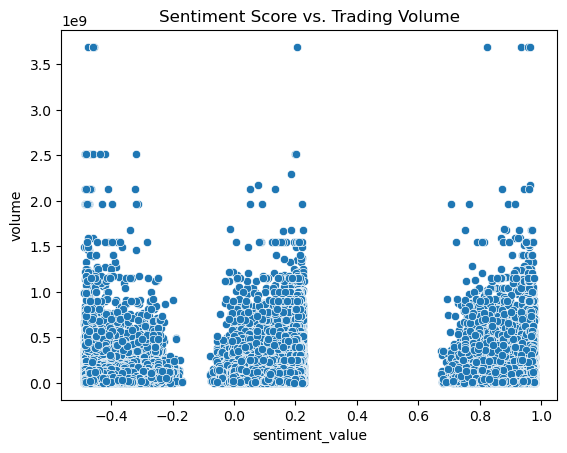

                 sentiment_value    volume
sentiment_value         1.000000 -0.002755
volume                 -0.002755  1.000000


In [177]:
import seaborn as sns
# Scatter plot of sentiment score vs. volume
sns.scatterplot(x='sentiment_value', y='volume', data=stock_senti)
plt.title("Sentiment Score vs. Trading Volume")
plt.show()

# Correlation
print(stock_senti[['sentiment_value', 'volume']].corr())

Correlation Between Sentiment and Daily Return:                  sentiment_value  daily_return
sentiment_value         1.000000      0.039975
daily_return            0.039975      1.000000


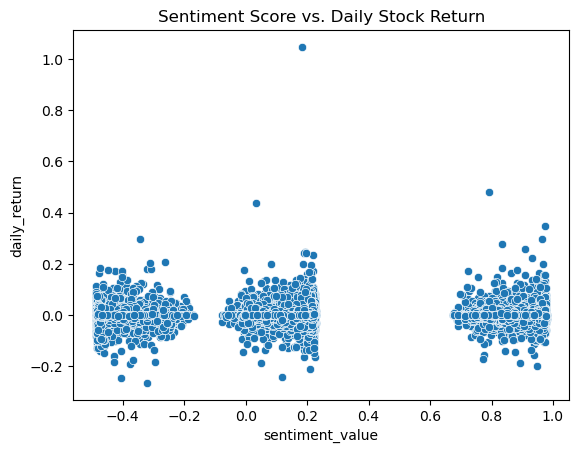

In [178]:
# Calculate daily returns
stock_senti['daily_return'] = stock_senti.groupby('tick')['close'].pct_change()

# Correlation between sentiment score and daily return
correlation = stock_senti[['sentiment_value', 'daily_return']].corr()
print("Correlation Between Sentiment and Daily Return:", correlation)

# Scatter plot
sns.scatterplot(x='sentiment_value', y='daily_return', data=stock_senti)
plt.title("Sentiment Score vs. Daily Stock Return")
plt.show()

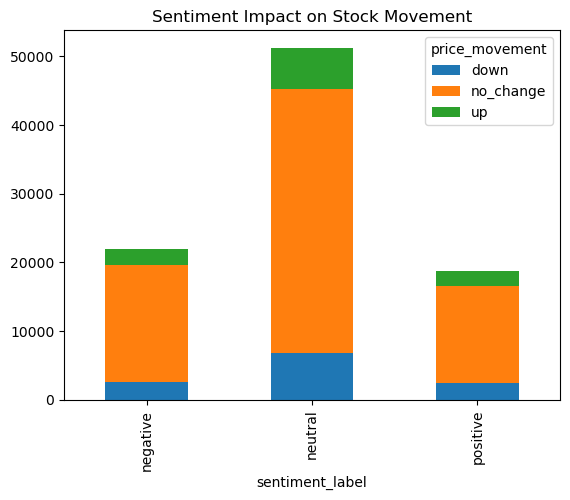

In [179]:
# Categorize stock movement
stock_senti['price_movement'] = stock_senti['close'].diff().apply(lambda x: 'up' if x > 0 else ('down' if x < 0 else 'no_change'))

# Group by sentiment and price movement
movement_sentiment = stock_senti.groupby(['sentiment_label', 'price_movement']).size().unstack()
movement_sentiment.plot(kind='bar', stacked=True, title="Sentiment Impact on Stock Movement")
plt.show()


Correlation Between Sentiment and Volatility:                  sentiment_value  volatility
sentiment_value         1.000000    0.025172
volatility              0.025172    1.000000


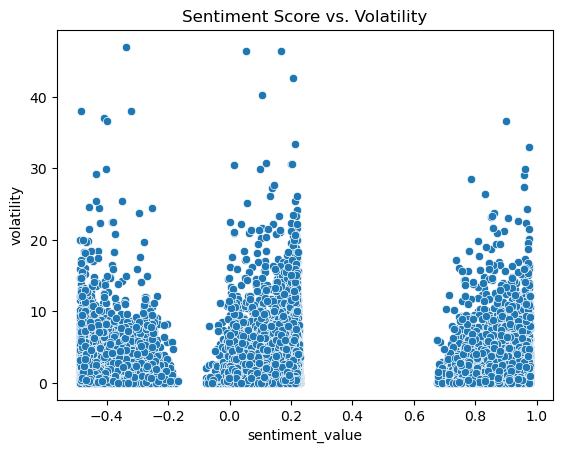

In [180]:
# Calculate rolling standard deviation as volatility
stock_senti['volatility'] = stock_senti.groupby('tick')['close'].rolling(window=5).std().reset_index(0, drop=True)

# Correlation between sentiment score and volatility
correlation = stock_senti[['sentiment_value', 'volatility']].corr()
print("Correlation Between Sentiment and Volatility:", correlation)

# Scatter plot
sns.scatterplot(x='sentiment_value', y='volatility', data=stock_senti)
plt.title("Sentiment Score vs. Volatility")
plt.show()


NameError: name 'df' is not defined